In [91]:
from datetime import datetime
import pandas as pd
import numpy as np 

In [92]:
def float_comma(s):
    return float(s.replace(',', '.'))

In [93]:
def time_from_begin(time_str):
    #16:53:11.947
    format_str = '%H:%M:%S.%f'

    time_obj = datetime.strptime(time_str, format_str)
    return time_obj

In [94]:
file = 'data/2 sensors/initial data/Avi_OK_1.txt'
#file = 'data/2 sensors/initial data/Avi_OK_2.txt'
#file = 'data/2 sensors/initial data/Avi_nOK_1.txt'
#file = 'data/2 sensors/initial data/Aikun_nOK_1.txt'
#file = 'data/2 sensors/initial data/Aikun_nOK_2.txt'
#file = 'data/2 sensors/initial data/Nastya_OK_1.txt'
#file = 'data/2 sensors/initial data/Vlad_OK_1.txt'
#file = 'data/2 sensors/initial data/Vlad_nOK_1.txt'

converters={'Acceleration X(g)':float_comma, 'Acceleration Y(g)':float_comma, 'Acceleration Z(g)':float_comma,
            'Angular velocity X(/s)':float_comma, 'Angular velocity Y(/s)':float_comma, 'Angular velocity Z(/s)':float_comma,
           'Time':time_from_begin}

df = pd.read_csv(file, sep='\t', skipinitialspace=True, 
                 converters=converters)

df = df[['Time', 'COM', 'Acceleration X(g)', 'Acceleration Y(g)', 'Acceleration Z(g)', 'Angular velocity X(/s)', 'Angular velocity Y(/s)', 'Angular velocity Z(/s)']]

In [95]:
df

,Time,COM,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(/s),Angular velocity Y(/s),Angular velocity Z(/s)
0,1900-01-01 22:35:12.942,COM3_115200,0.266,-0.871,1.644,5.554,-22.461,-3.296
1,1900-01-01 22:35:12.995,COM8_115200,0.379,0.841,1.611,-3.723,8.728,-2.930
2,1900-01-01 22:35:12.996,COM8_115200,0.386,0.838,1.615,-3.418,11.230,-1.770
3,1900-01-01 22:35:12.998,COM8_115200,0.385,0.838,1.632,-2.441,9.766,0.000
4,1900-01-01 22:35:13.002,COM3_115200,0.254,-0.875,1.642,6.653,-19.836,-3.357
...,...,...,...,...,...,...,...,...
7965,1900-01-01 22:36:32.502,COM3_115200,0.367,-0.913,2.055,5.249,-3.418,0.000
7966,1900-01-01 22:36:32.518,COM3_115200,0.378,-0.912,2.061,5.981,-4.211,-0.549
7967,1900-01-01 22:36:32.518,COM3_115200,0.365,-0.914,2.071,6.165,-5.188,-0.977
7968,1900-01-01 22:36:32.533,COM8_115200,0.437,0.913,2.026,-4.089,4.639,0.977


In [96]:
df['TimeFromStart'] = df['Time'] - df['Time'][0]
df = df.drop(columns='Time', axis=1)
df

,COM,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(/s),Angular velocity Y(/s),Angular velocity Z(/s),TimeFromStart
0,COM3_115200,0.266,-0.871,1.644,5.554,-22.461,-3.296,0 days 00:00:00
1,COM8_115200,0.379,0.841,1.611,-3.723,8.728,-2.930,0 days 00:00:00.053000
2,COM8_115200,0.386,0.838,1.615,-3.418,11.230,-1.770,0 days 00:00:00.054000
3,COM8_115200,0.385,0.838,1.632,-2.441,9.766,0.000,0 days 00:00:00.056000
4,COM3_115200,0.254,-0.875,1.642,6.653,-19.836,-3.357,0 days 00:00:00.060000
...,...,...,...,...,...,...,...,...
7965,COM3_115200,0.367,-0.913,2.055,5.249,-3.418,0.000,0 days 00:01:19.560000
7966,COM3_115200,0.378,-0.912,2.061,5.981,-4.211,-0.549,0 days 00:01:19.576000
7967,COM3_115200,0.365,-0.914,2.071,6.165,-5.188,-0.977,0 days 00:01:19.576000
7968,COM8_115200,0.437,0.913,2.026,-4.089,4.639,0.977,0 days 00:01:19.591000


In [97]:
df1 = df.loc[(df['COM'] == 'COM3_115200')] #left hand
df1.rename(columns = {'Acceleration X(g)':'ax_left', 'Acceleration Y(g)':'ay_left', 'Acceleration Z(g)':'az_left', 
                     'Angular velocity X(/s)':'wx_left', 'Angular velocity Y(/s)':'wy_left', 'Angular velocity Z(/s)': 'wz_left'}, inplace = True )
df1 = df1.drop(columns='COM', axis=1)
df1.reset_index(drop= True , inplace= True )
df1

C:\Users\aikyn\AppData\Local\Temp\ipykernel_13352\1584847512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Acceleration X(g)':'ax_left', 'Acceleration Y(g)':'ay_left', 'Acceleration Z(g)':'az_left',


,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,TimeFromStart
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0 days 00:00:00
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0 days 00:00:00.060000
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0 days 00:00:00.064000
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0 days 00:00:00.068000
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0 days 00:00:00.071000
...,...,...,...,...,...,...,...
3985,0.360,-0.908,2.055,3.235,-1.221,0.000,0 days 00:01:19.513000
3986,0.359,-0.910,2.051,4.456,-2.930,0.122,0 days 00:01:19.529000
3987,0.367,-0.913,2.055,5.249,-3.418,0.000,0 days 00:01:19.560000
3988,0.378,-0.912,2.061,5.981,-4.211,-0.549,0 days 00:01:19.576000


In [98]:
df2 = df.loc[(df['COM'] == 'COM8_115200')] #right hand
df2.rename(columns = {'Acceleration X(g)':'ax_right', 'Acceleration Y(g)':'ay_right', 'Acceleration Z(g)':'az_right', 
                     'Angular velocity X(/s)':'wx_right', 'Angular velocity Y(/s)':'wy_right', 'Angular velocity Z(/s)': 'wz_right'}, inplace = True )
df2 = df2.drop(columns='COM', axis=1)
df2.reset_index(drop= True , inplace= True )
df2

C:\Users\aikyn\AppData\Local\Temp\ipykernel_13352\1256333896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'Acceleration X(g)':'ax_right', 'Acceleration Y(g)':'ay_right', 'Acceleration Z(g)':'az_right',


,ax_right,ay_right,az_right,wx_right,wy_right,wz_right,TimeFromStart
0,0.379,0.841,1.611,-3.723,8.728,-2.930,0 days 00:00:00.053000
1,0.386,0.838,1.615,-3.418,11.230,-1.770,0 days 00:00:00.054000
2,0.385,0.838,1.632,-2.441,9.766,0.000,0 days 00:00:00.056000
3,0.393,0.841,1.650,-2.441,7.629,1.221,0 days 00:00:00.070000
4,0.378,0.847,1.631,-0.793,9.705,1.587,0 days 00:00:00.087000
...,...,...,...,...,...,...,...
3975,0.409,0.904,2.010,-3.845,-1.160,0.854,0 days 00:01:19.497000
3976,0.424,0.906,2.008,-3.479,2.075,0.122,0 days 00:01:19.529000
3977,0.426,0.916,2.020,-4.272,2.991,0.427,0 days 00:01:19.560000
3978,0.437,0.913,2.026,-4.089,4.639,0.977,0 days 00:01:19.591000


In [99]:
col_names = ['ax_right', 'ay_right', 'az_right', 'wx_right', 'wy_right', 'wz_right']
df1[col_names] = df2[col_names]
df = df1.dropna()
df

,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,TimeFromStart,ax_right,ay_right,az_right,wx_right,wy_right,wz_right
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0 days 00:00:00,0.379,0.841,1.611,-3.723,8.728,-2.930
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0 days 00:00:00.060000,0.386,0.838,1.615,-3.418,11.230,-1.770
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0 days 00:00:00.064000,0.385,0.838,1.632,-2.441,9.766,0.000
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0 days 00:00:00.068000,0.393,0.841,1.650,-2.441,7.629,1.221
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0 days 00:00:00.071000,0.378,0.847,1.631,-0.793,9.705,1.587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,0.357,-0.902,2.018,-1.709,0.854,1.953,0 days 00:01:19.310000,0.409,0.904,2.010,-3.845,-1.160,0.854
3976,0.359,-0.901,2.024,-1.343,1.465,0.854,0 days 00:01:19.326000,0.424,0.906,2.008,-3.479,2.075,0.122
3977,0.363,-0.905,2.032,-0.366,3.174,0.610,0 days 00:01:19.341000,0.426,0.916,2.020,-4.272,2.991,0.427
3978,0.368,-0.913,2.029,0.000,6.653,0.305,0 days 00:01:19.357000,0.437,0.913,2.026,-4.089,4.639,0.977


In [100]:
file_mark = 'data/2 sensors/initial data/Avi_OK_1_mark.txt'
#file_mark = 'data/2 sensors/initial data/Avi_OK_2_mark.txt'
#file_mark = 'data/2 sensors/initial data/Avi_nOK_1_mark.txt'
#file_mark = 'data/2 sensors/initial data/Aikun_nOK_1_mark.txt'
#file_mark = 'data/2 sensors/initial data/Aikun_nOK_2_mark.txt'
#file_mark = 'data/2 sensors/initial data/Nastya_OK_1_mark.txt'
#file_mark = 'data/2 sensors/initial data/Vlad_OK_1_mark.txt'
#file_mark = 'data/2 sensors/initial data/Vlad_nOK_1_mark.txt'

df_mark = pd.read_csv(file_mark,sep='\t')
#df_mark = pd.read_csv(file_mark,sep=' ') #for other files

df_mark

,start(s),end(s),label
0,00:00:00,00:00:07,1
1,00:00:07,00:00:13,1
2,00:00:13,00:00:18,1
3,00:00:18,00:00:24,1
4,00:00:24,00:00:30,1
5,00:00:30,00:00:36,1
6,00:00:36,00:00:42,1
7,00:00:42,00:00:49,1
8,00:00:49,00:00:56,1
9,00:00:56,00:01:03,1


In [101]:
df_mark.iloc[3,0]

'00:00:18'

In [102]:
df_mark.shape
match = list(np.where(df['TimeFromStart']=='{0}'.format(df_mark.iloc[0,0])))
match.append((np.where(df['TimeFromStart']=='{0}'.format(df_mark.iloc[0, 0])))[0])
print(match)

[array([0], dtype=int64), array([0], dtype=int64)]


In [103]:
for i in range(0, df_mark.shape[0]):
    for j in range(0, 2):
        if i == 0 and j == 0:
            match = list(np.where(df['TimeFromStart']=='{0}'.format(df_mark.iloc[0,0]))[0])
            #match = [0]
            continue
    match.append((np.where(df['TimeFromStart']>'{0}'.format(df_mark.iloc[i, j])))[0][0])
    #match.append((np.where(df['TimeFromStart']<'{0}'.format(df_mark.iloc[i, j])))[0][-1])
    
for i in range(0, len(match)):
    print(match[i])
        

0
351
651
903
1203
1504
1805
2106
2456
2807
3158
3509
3810


In [104]:
ind = range(351, 651)

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
def time_ind (ind, df):
    time = []
    for i in ind:
        time.append(df['TimeFromStart'][i].total_seconds())
    return time  

In [107]:
df_OK = df
ind_OK = ind

<Figure size 640x480 with 0 Axes>

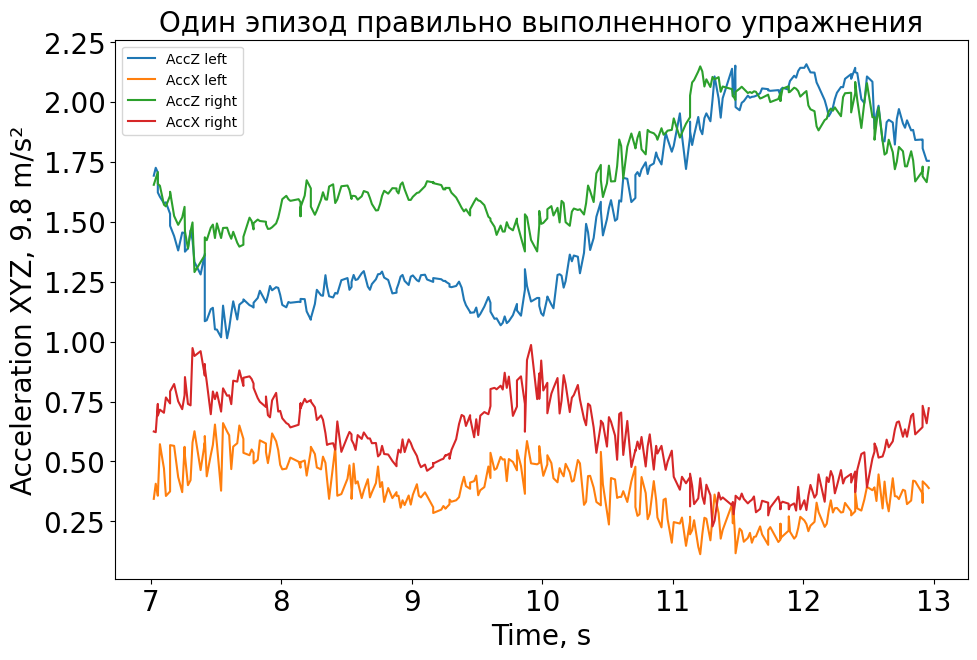

In [108]:
plt.figure()
plt.figure(figsize=(11,7))
#plt.plot(time_ind(ind_OK, df_OK), df_OK['ay_left'][ind_OK], label='AccY left')
plt.plot(time_ind(ind_OK, df_OK), df_OK['az_left'][ind_OK], label='AccZ left')
plt.plot(time_ind(ind_OK, df_OK), df_OK['ax_left'][ind_OK], label='AccX left')
#plt.plot(time_ind(ind_OK, df_OK), df_OK['ay_right'][ind_OK], label='AccY right')
plt.plot(time_ind(ind_OK, df_OK), df_OK['az_right'][ind_OK], label='AccZ right')
plt.plot(time_ind(ind_OK, df_OK), df_OK['ax_right'][ind_OK], label='AccX right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time, s', fontsize=20)
plt.ylabel('Acceleration XYZ, 9.8 m/s²', fontsize=20)
plt.title(r'Один эпизод правильно выполненного упражнения', fontsize=20)
plt.legend()

In [109]:
id = np.zeros(df.shape[0], dtype='int')
for i in range(0, len(match)-1):
    id[int(match[i]): int(match[i+1])] = i+1
df['id']=id
df

C:\Users\aikyn\AppData\Local\Temp\ipykernel_13352\1227731591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id']=id


,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,TimeFromStart,ax_right,ay_right,az_right,wx_right,wy_right,wz_right,id
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0 days 00:00:00,0.379,0.841,1.611,-3.723,8.728,-2.930,1
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0 days 00:00:00.060000,0.386,0.838,1.615,-3.418,11.230,-1.770,1
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0 days 00:00:00.064000,0.385,0.838,1.632,-2.441,9.766,0.000,1
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0 days 00:00:00.068000,0.393,0.841,1.650,-2.441,7.629,1.221,1
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0 days 00:00:00.071000,0.378,0.847,1.631,-0.793,9.705,1.587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,0.357,-0.902,2.018,-1.709,0.854,1.953,0 days 00:01:19.310000,0.409,0.904,2.010,-3.845,-1.160,0.854,0
3976,0.359,-0.901,2.024,-1.343,1.465,0.854,0 days 00:01:19.326000,0.424,0.906,2.008,-3.479,2.075,0.122,0
3977,0.363,-0.905,2.032,-0.366,3.174,0.610,0 days 00:01:19.341000,0.426,0.916,2.020,-4.272,2.991,0.427,0
3978,0.368,-0.913,2.029,0.000,6.653,0.305,0 days 00:01:19.357000,0.437,0.913,2.026,-4.089,4.639,0.977,0


In [110]:
time = np.zeros(df.shape[0], dtype='int')
for i in range(0, len(match)-1):
    time[int(match[i]): int(match[i+1])] = np.arange(0,int(match[i+1]) - int(match[i]),1)

df['time']=time
df = df.drop(df.index[int(match[len(match) - 1]):])
df

C:\Users\aikyn\AppData\Local\Temp\ipykernel_13352\3677710419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=time


,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,TimeFromStart,ax_right,ay_right,az_right,wx_right,wy_right,wz_right,id,time
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0 days 00:00:00,0.379,0.841,1.611,-3.723,8.728,-2.930,1,0
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0 days 00:00:00.060000,0.386,0.838,1.615,-3.418,11.230,-1.770,1,1
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0 days 00:00:00.064000,0.385,0.838,1.632,-2.441,9.766,0.000,1,2
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0 days 00:00:00.068000,0.393,0.841,1.650,-2.441,7.629,1.221,1,3
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0 days 00:00:00.071000,0.378,0.847,1.631,-0.793,9.705,1.587,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,0.362,-0.951,1.979,-2.869,20.874,22.217,0 days 00:01:15.918000,0.370,0.954,1.972,-0.916,8.362,-5.432,12,296
3806,0.289,-0.870,1.996,-0.122,18.799,20.203,0 days 00:01:15.933000,0.355,0.943,1.976,-1.526,13.245,-5.920,12,297
3807,0.290,-0.915,2.011,1.526,22.278,14.221,0 days 00:01:15.949000,0.188,0.954,1.939,-3.235,17.273,-7.324,12,298
3808,0.287,-0.930,2.017,0.000,15.625,13.916,0 days 00:01:15.980000,0.388,0.926,1.953,-6.653,9.155,1.038,12,299


In [111]:
df = df.drop('TimeFromStart', axis=1)
df['person'] = 'Avi'
#df['person'] = 'Aikun'
#df['person'] = 'Vlad'
#df['person'] = 'Nastya'
df

,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,ax_right,ay_right,az_right,wx_right,wy_right,wz_right,id,time,person
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0.379,0.841,1.611,-3.723,8.728,-2.930,1,0,Avi
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0.386,0.838,1.615,-3.418,11.230,-1.770,1,1,Avi
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0.385,0.838,1.632,-2.441,9.766,0.000,1,2,Avi
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0.393,0.841,1.650,-2.441,7.629,1.221,1,3,Avi
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0.378,0.847,1.631,-0.793,9.705,1.587,1,4,Avi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,0.362,-0.951,1.979,-2.869,20.874,22.217,0.370,0.954,1.972,-0.916,8.362,-5.432,12,296,Avi
3806,0.289,-0.870,1.996,-0.122,18.799,20.203,0.355,0.943,1.976,-1.526,13.245,-5.920,12,297,Avi
3807,0.290,-0.915,2.011,1.526,22.278,14.221,0.188,0.954,1.939,-3.235,17.273,-7.324,12,298,Avi
3808,0.287,-0.930,2.017,0.000,15.625,13.916,0.388,0.926,1.953,-6.653,9.155,1.038,12,299,Avi


In [112]:
df.to_csv('data/2 sensors/processed data/Avi_OK_1.txt', index=False)
df_mark['label'].to_csv('data/2 sensors/Avi_OK_1_mark.txt', index=False)

In [113]:
file1 = 'data/2 sensors/processed data/Avi_OK_1.txt'
df1 = pd.read_csv(file1, 
                  delimiter=',')
file2 = 'data/2 sensors/processed data/Avi_OK_2.txt'
df2 = pd.read_csv(file2, 
                  delimiter=',')
file3 = 'data/2 sensors/processed data/Aikun_nOK_1.txt'
df3 = pd.read_csv(file3, 
                  delimiter=',')
file4 = 'data/2 sensors/processed data/Aikun_nOK_2.txt'
df4 = pd.read_csv(file4,  
                  delimiter=',')
file5 = 'data/2 sensors/processed data/Avi_nOK_1.txt'
df5 = pd.read_csv(file5,  
                  delimiter=',')
file6 = 'data/2 sensors/processed data/Vlad_OK_1.txt'
df6 = pd.read_csv(file6,  
                  delimiter=',')
file7 = 'data/2 sensors/processed data/Vlad_nOK_1.txt'
df7 = pd.read_csv(file7,  
                  delimiter=',')
file8 = 'data/2 sensors/processed data/Nastya_OK_1.txt'
df8 = pd.read_csv(file8,  
                  delimiter=',')

In [114]:
df_X = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df_X

,ax_left,ay_left,az_left,wx_left,wy_left,wz_left,ax_right,ay_right,az_right,wx_right,wy_right,wz_right,id,time,person
0,0.266,-0.871,1.644,5.554,-22.461,-3.296,0.379,0.841,1.611,-3.723,8.728,-2.930,1,0,Avi
1,0.254,-0.875,1.642,6.653,-19.836,-3.357,0.386,0.838,1.615,-3.418,11.230,-1.770,1,1,Avi
2,0.279,-0.884,1.636,7.629,-17.212,-3.784,0.385,0.838,1.632,-2.441,9.766,0.000,1,2,Avi
3,0.253,-0.906,1.640,7.874,-13.306,-4.089,0.393,0.841,1.650,-2.441,7.629,1.221,1,3,Avi
4,0.244,-0.908,1.658,7.568,-12.573,-3.235,0.378,0.847,1.631,-0.793,9.705,1.587,1,4,Avi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25490,-0.392,0.891,1.675,-11.963,7.629,2.502,0.265,0.859,1.742,-5.676,-4.456,-4.089,89,445,Nastya
25491,-0.364,0.854,1.702,-11.963,12.939,0.610,0.273,0.852,1.732,-2.563,1.953,-1.770,89,446,Nastya
25492,-0.449,0.871,1.698,-10.742,21.790,-3.906,0.239,0.902,1.677,-2.319,12.817,-0.366,89,447,Nastya
25493,-0.406,0.905,1.663,-10.925,18.616,-5.920,0.241,0.945,1.695,-4.700,16.052,-2.502,89,448,Nastya


In [115]:
df_y1 = pd.read_csv('data/2 sensors/processed data/Avi_OK_1_mark.txt')
df_y2 = pd.read_csv('data/2 sensors/processed data/Avi_OK_2_mark.txt')
df_y3 = pd.read_csv('data/2 sensors/processed data/Aikun_nOK_1_mark.txt')
df_y4 = pd.read_csv('data/2 sensors/processed data/Aikun_nOK_2_mark.txt')
df_y5 = pd.read_csv('data/2 sensors/processed data/Aikun_nOK_2_mark.txt')
df_y6 = pd.read_csv('data/2 sensors/processed data/Vlad_OK_1_mark.txt')
df_y7 = pd.read_csv('data/2 sensors/processed data/Vlad_nOK_1_mark.txt')
df_y8 = pd.read_csv('data/2 sensors/processed data/Nastya_OK_1_mark.txt')

In [116]:
df_y = pd.concat([df_y1, df_y2, df_y3, df_y4, df_y5, df_y6, df_y7, df_y8], ignore_index=True)
df_y

,label
0,1
1,1
2,1
3,1
4,1
...,...
84,1
85,1
86,1
87,1


In [117]:
df_X.to_csv('data/2 sensors/X_2.csv', index=False)
df_y.to_csv('data/2 sensors/y_2.csv', index=False)

In [118]:
df_X = df_X.drop('person', axis=1)

In [119]:
from tsfresh import extract_features
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
X = extract_features(df_X, default_fc_parameters=MinimalFCParameters(), column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]


In [120]:
len(X) == len(df_y)

True

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, df_y)

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, df_y, test_size=0.33, random_state=42)

In [74]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print("Precision of SVM classifier: {:.3f}".format(metrics.precision_score(y_test, y_pred)))

print("Recall of SVM classifier:{:.3f}".format(metrics.recall_score(y_test, y_pred)))

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.800
Precision of SVM classifier: 0.706
Recall of SVM classifier:0.923


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Accuracy knn: {:.3f}".format(metrics.accuracy_score(y_test, knn.predict(X_test))))

print("Precision of knn classifier: {:.3f}".format(metrics.precision_score(y_test, knn.predict(X_test))))

print("Recall of knn classifier: {:.3f}".format(metrics.recall_score(y_test, knn.predict(X_test))))

Accuracy knn: 0.933
Precision of knn classifier: 0.923
Recall of knn classifier: 0.923


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


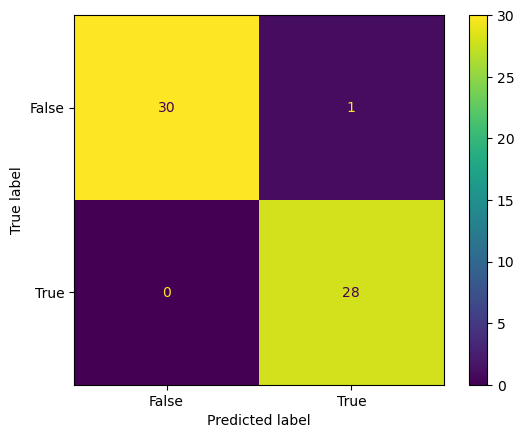

In [89]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, knn.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

print("Accuracy of Logistic regression: {:.3f}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

print("Precision of Logistic regression: {:.3f}".format(metrics.precision_score(y_test, logreg.predict(X_test))))

print("Recall of Logistic regression: {:.3f}".format(metrics.recall_score(y_test, logreg.predict(X_test))))

Accuracy of Logistic regression: 0.800
Precision of Logistic regression: 0.706
Recall of Logistic regression: 0.923


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
